In [35]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [36]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [37]:
apt = pd.read_excel('../data/아파트실거래가 년월.xlsx', 
                                          encoding='euc-kr', thousands=',',
                                          index_col=0)
apt.head()

,시구동단지명,년월,매매가
1.0,광주광역시 서구 화정동 흥국 64.55,20070501,5100
NaN,광주광역시 서구 화정동 흥국 64.55,20070601,4700
NaN,광주광역시 서구 화정동 흥국 64.55,20070701,5100
NaN,광주광역시 서구 화정동 흥국 64.55,20080201,5100
NaN,광주광역시 서구 화정동 흥국 64.55,20080501,5000


In [38]:
apt.rename(columns={"년월":"date"}, inplace=True)
apt.rename(columns={"매매가":"hit"}, inplace=True)

In [39]:
df = apt.reset_index()

In [40]:
df = apt.loc[apt["시구동단지명"]=="광주광역시 북구 용봉동 삼성 133.35",["시구동단지명","date","hit"]]

In [41]:
df=df.rename(columns={'date':'ds', 'hit':'y'})
df.head()

,시구동단지명,ds,y
NaN,광주광역시 북구 용봉동 삼성 133.35,20061201,14400
NaN,광주광역시 북구 용봉동 삼성 133.35,20070101,14250
NaN,광주광역시 북구 용봉동 삼성 133.35,20070201,14000
NaN,광주광역시 북구 용봉동 삼성 133.35,20070401,11500
NaN,광주광역시 북구 용봉동 삼성 133.35,20070501,15700


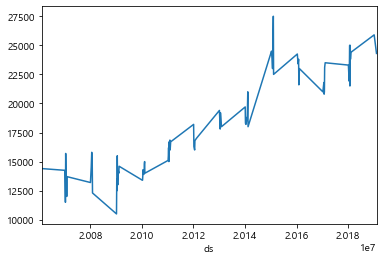

In [215]:
df.set_index('ds').y.plot()

In [238]:
model = Prophet(yearly_seasonality =True,weekly_seasonality=False,daily_seasonality=True)
model.fit(df)

In [239]:
future = model.make_future_dataframe(periods=630,freq = 'm')
future.tail()

,ds
712,2022-02-28 00:00:00.020191001
713,2022-03-31 00:00:00.020191001
714,2022-04-30 00:00:00.020191001
715,2022-05-31 00:00:00.020191001
716,2022-06-30 00:00:00.020191001


In [240]:
future = model.make_future_dataframe(periods=630,freq = 'm')
future.tail()

,ds
712,2022-02-28 00:00:00.020191001
713,2022-03-31 00:00:00.020191001
714,2022-04-30 00:00:00.020191001
715,2022-05-31 00:00:00.020191001
716,2022-06-30 00:00:00.020191001


In [241]:
forecast = model.predict(future)

In [242]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
712,2022-02-28 00:00:00.020191001,15285.603024,25612.017959,28999.835436,15074.071244,15496.755825,12029.162315,12029.162315,12029.162315,12160.605561,12160.605561,12160.605561,-131.443245,-131.443245,-131.443245,0.0,0.0,0.0,27314.765339
713,2022-03-31 00:00:00.020191001,15365.036137,24618.753377,28013.584568,15144.058940,15587.017343,11031.732224,11031.732224,11031.732224,12160.605561,12160.605561,12160.605561,-1128.873337,-1128.873337,-1128.873337,0.0,0.0,0.0,26396.768361
714,2022-04-30 00:00:00.020191001,15441.906892,27527.588283,30766.984197,15207.854823,15677.704341,13781.657097,13781.657097,13781.657097,12160.605561,12160.605561,12160.605561,1621.051536,1621.051536,1621.051536,0.0,0.0,0.0,29223.563989
715,2022-05-31 00:00:00.020191001,15521.340006,25044.460653,28491.637757,15272.715593,15778.286156,11319.747219,11319.747219,11319.747219,12160.605561,12160.605561,12160.605561,-840.858341,-840.858341,-840.858341,0.0,0.0,0.0,26841.087225
716,2022-06-30 00:00:00.020191001,15598.210761,27157.127352,30516.145696,15336.461321,15868.077591,13173.067471,13173.067471,13173.067471,12160.605561,12160.605561,12160.605561,1012.461910,1012.461910,1012.461910,0.0,0.0,0.0,28771.278231


In [243]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
712,2022-02-28 00:00:00.020191001,27314.765339,25612.017959,28999.835436
713,2022-03-31 00:00:00.020191001,26396.768361,24618.753377,28013.584568
714,2022-04-30 00:00:00.020191001,29223.563989,27527.588283,30766.984197
715,2022-05-31 00:00:00.020191001,26841.087225,25044.460653,28491.637757
716,2022-06-30 00:00:00.020191001,28771.278231,27157.127352,30516.145696


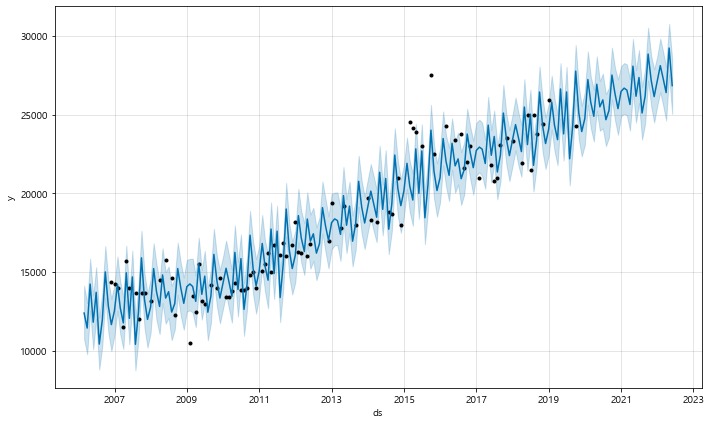

In [246]:
model.plot(forecast[520:716]);